In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/crop_production.csv")
df.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [2]:
df.shape

(246091, 7)

In [3]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
df.describe

<bound method NDFrame.describe of                          State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Pr

In [6]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Production'] = df['Production'].fillna(0)

In [9]:
df['Area'] = df['Area'].fillna(0)


In [10]:
df = df[~((df['Production'] == 0 ) & (df['Area'] == 0))]

In [11]:
df = df.drop_duplicates()

In [12]:
df['State_Name'] = df['State_Name'].str.strip().str.title()
df['Crop'] = df['Crop'].str.strip().str.title()
df['Season'] = df['Season'].str.strip().str.title()


In [13]:
df['Crop_Year'] = df['Crop_Year'].astype(int)

In [14]:
df = df[df['Area'] >= 0]
df = df[df['Production'] >= 0]

In [15]:
df.to_csv("../data/cleaned/crop_production_clean.csv", index=False)

In [16]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [17]:
import pandas as pd
df = pd.read_csv("../data/cleaned/crop_production_clean.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman And Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman And Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif Pulses,2.0,1.0
2,Andaman And Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman And Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman And Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [18]:
#new feature
df['Yield'] = df['Production'] / df['Area']

In [19]:
df.replace([float('inf'), -float('inf')], 0, inplace=True)
df['Yield'] = df['Yield'].fillna(0)


In [20]:
crop_production = df.groupby('Crop')['Production'].sum().reset_index()

In [21]:
state_production = df.groupby('State_Name')['Production'].sum().reset_index()

In [22]:
yearly_production = df.groupby('Crop_Year')['Production'].sum().reset_index()

In [23]:
season_production = df.groupby('Season')['Production'].sum().reset_index()

In [24]:
crop_production.to_csv("../data/analytical_tables/crop_summary.csv", index=False)
state_production.to_csv("../data/analytical_tables/state_summary.csv", index=False)
yearly_production.to_csv("../data/analytical_tables/yearly_summary.csv", index=False)
season_production.to_csv("../data/analytical_tables/season_summary.csv", index=False)

In [25]:
df.to_csv("../data/featured/crop_production_featured.csv", index=False)

In [26]:
df = pd.read_csv("../data/featured/crop_production_featured.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman And Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman And Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif Pulses,2.0,1.0,0.500000
2,Andaman And Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman And Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman And Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167


In [27]:
df = pd.read_csv("../data/featured/crop_production_featured.csv")

crop_summary = pd.read_csv("../data/analytical_tables/crop_summary.csv")
state_summary = pd.read_csv("../data/analytical_tables/state_summary.csv")
yearly_summary = pd.read_csv("../data/analytical_tables/yearly_summary.csv")
season_summary = pd.read_csv("../data/analytical_tables/season_summary.csv")


In [28]:
df['Yield'].describe()

count    246091.000000
mean         41.017785
std         811.369139
min           0.000000
25%           0.500000
50%           1.000000
75%           2.312397
max       88000.000000
Name: Yield, dtype: float64

In [29]:
crop_summary.sort_values(by="Production", ascending=False).head(10)

,Crop,Production
28,Coconut,1.299816e+11
109,Sugarcane,5.535682e+09
98,Rice,1.605470e+09
122,Wheat,1.332826e+09
90,Potato,4.248263e+08
33,Cotton(Lint),2.970000e+08
59,Maize,2.733418e+08
49,Jute,1.815582e+08
7,Banana,1.461327e+08
108,Soyabean,1.418372e+08


In [30]:
state_summary.sort_values(by="Production", ascending=False).head(5)

,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09


In [31]:
yearly_summary.sort_values(by = "Crop_Year")

,Crop_Year,Production
0,1997,8.512329e+08
1,1998,5.825321e+09
2,1999,6.434666e+09
3,2000,7.449709e+09
4,2001,7.465541e+09
5,2002,7.696955e+09
6,2003,7.917974e+09
7,2004,8.189462e+09
8,2005,8.043757e+09
9,2006,8.681913e+09


In [32]:
season_summary.sort_values(by="Production",ascending=False)

,Season,Production
4,Whole Year,1.344248e+11
1,Kharif,4.029970e+09
2,Rabi,2.051688e+09
5,Winter,4.345498e+08
3,Summer,1.706579e+08
0,Autumn,6.441377e+07


In [33]:
df.groupby('Crop')['Production'].mean().sort_values(ascending=False).head(5)

Crop
Coconut            6.548193e+07
Sugarcane          6.988614e+05
Total Foodgrain    2.301636e+05
Wheat              1.687335e+05
Jute               1.249540e+05
Name: Production, dtype: float64

In [34]:
df[df['Yield'] > df['Yield'].quantile(0.99)] #This is outlies based and it can be extreme

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
5,Andaman And Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0,3583.223250
14,Andaman And Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0,3542.056075
23,Andaman And Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0,3700.109649
32,Andaman And Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0,3750.668590
41,Andaman And Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0,2847.559351
...,...,...,...,...,...,...,...,...
245548,West Bengal,PURULIA,1999,Whole Year,Sugarcane,406.00,39422.0,97.098522
245617,West Bengal,PURULIA,2001,Whole Year,Sugarcane,1180.00,116420.0,98.661017
245792,West Bengal,PURULIA,2006,Whole Year,Coconut,73.00,365000.0,5000.000000
245837,West Bengal,PURULIA,2007,Whole Year,Coconut,58.00,898000.0,15482.758621


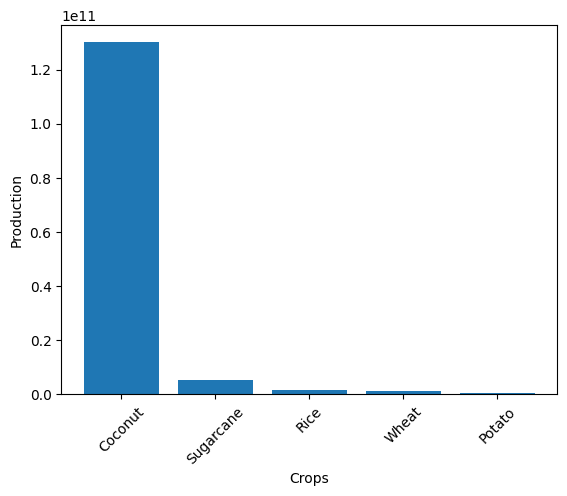

In [45]:
import matplotlib.pyplot as plt

top_crops = crop_summary.sort_values(by="Production", ascending=False).head()

plt.figure()
plt.bar(top_crops['Crop'],top_crops['Production'])
plt.xlabel("Crops")
plt.ylabel("Production")
plt.xticks(rotation=45)
plt.show()

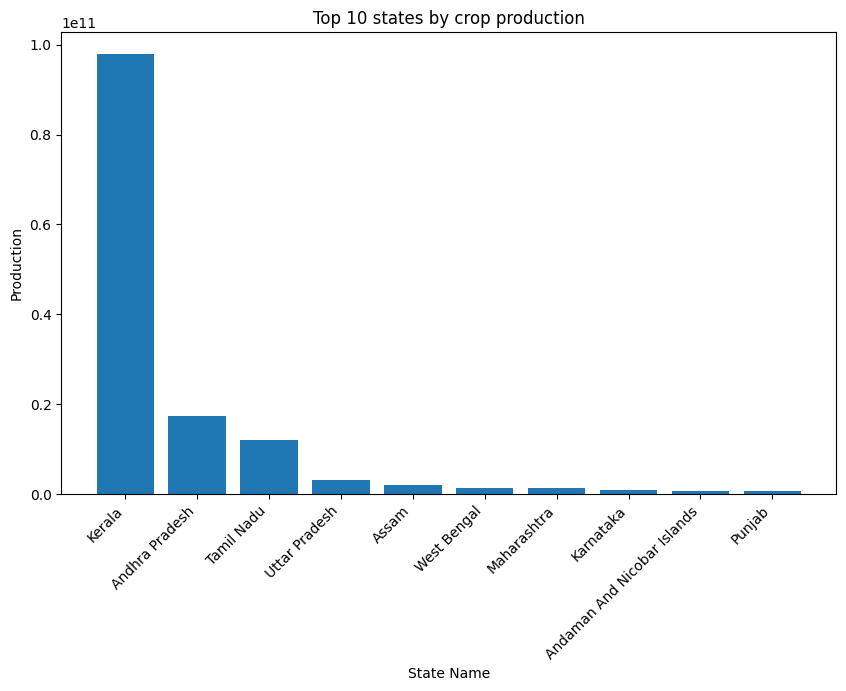

In [54]:
#state summary visuals
top_states = state_summary.sort_values(by="Production",ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_states['State_Name'],top_states['Production'])
plt.xlabel("State Name")
plt.ylabel("Production")
plt.title("Top 10 states by crop production")
plt.xticks(rotation=45, ha='right')
plt.show()

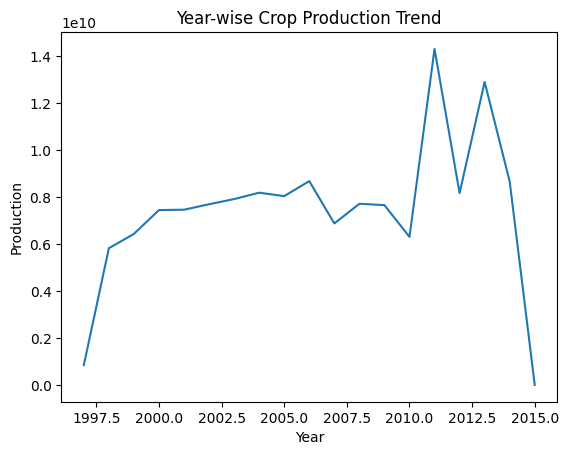

In [56]:
yearly_summary = yearly_summary.sort_values(by='Crop_Year')

plt.figure()
plt.plot(yearly_summary['Crop_Year'], yearly_summary['Production'])
plt.xlabel("Year")
plt.ylabel("Production")
plt.title("Year-wise Crop Production Trend")
plt.show()

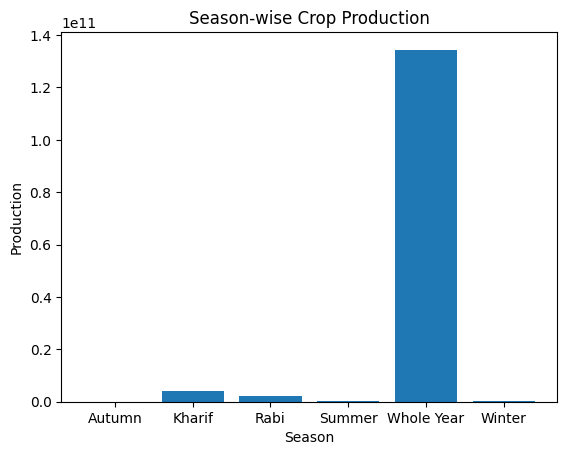

In [57]:
plt.figure()
plt.bar(season_summary['Season'], season_summary['Production'])
plt.xlabel("Season")
plt.ylabel("Production")
plt.title("Season-wise Crop Production")
plt.show()